In [1]:
import pandas as pd

df = pd.read_csv('data/dataset.csv', index_col=0)
df

,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
id,,,,,,,,,,,,,,,,,,,,,
0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,FEDERAL WAY,...,0,0,0,0,0,0,0,0,0,I
1,1999-01-15,313300,NaN,26,nochg,2025,47.6531,-122.1996,74,KIRKLAND,...,0,0,0,0,0,1,0,0,0,Q
2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,RENTON,...,0,0,0,0,0,0,0,0,0,K
3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,BURIEN,...,0,0,0,0,0,0,0,0,0,G
4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,KING COUNTY,...,0,0,0,0,0,0,0,0,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2000-08-15,277500,1.0,,nochg,2025,47.5503,-122.0285,69,ISSAQUAH,...,0,0,0,0,0,0,0,0,0,O
199996,2019-07-15,1296000,2.0,,new,2025,47.6789,-122.1164,72,REDMOND,...,0,0,0,0,0,0,0,0,0,P
199997,2018-06-15,845000,2.0,,new,2025,47.6939,-122.3542,6,SEATTLE,...,0,0,0,0,0,0,0,0,0,B


In [2]:
df['sale_price'].describe()

count    2.000000e+05
mean     5.841495e+05
std      4.170595e+05
min      5.029300e+04
25%      3.050000e+05
50%      4.599500e+05
75%      7.249500e+05
max      2.999950e+06
Name: sale_price, dtype: float64

<Axes: >

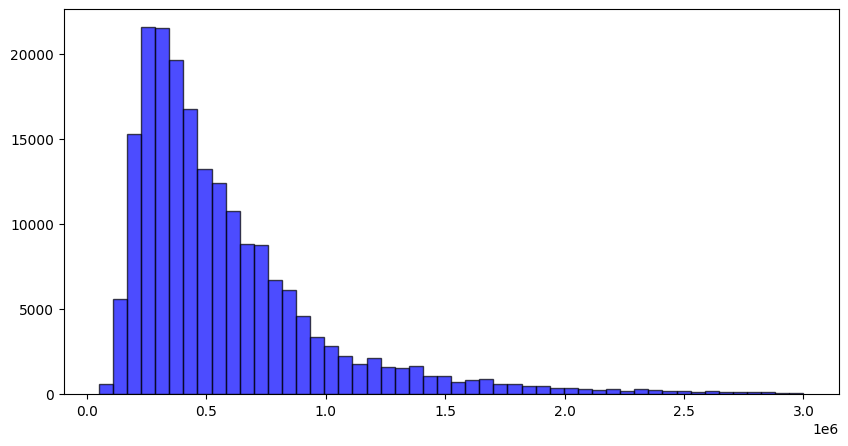

In [3]:
df['sale_price'].hist(bins=50, figsize=(10, 5), grid=False, color='blue', edgecolor='black', alpha=0.7)

In [4]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
train, val = TabularDataset(train_df), TabularDataset(val_df)

/Users/clementcouchevellou/Documents/Personal projects/prediction_interval_comp_II-house_price/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
predictor = TabularPredictor(
    label='sale_price',
    problem_type='quantile',
    quantile_levels=[0.05, 0.5, 0.95],
    path='autogluon_models',
    eval_metric='pinball_loss',
    verbosity=2,
).fit(
    train.sample(frac=0.8, random_state=42),
    #hyperparameters='light',
    presets='best_quality',
    dynamic_stacking=True,
    calibrate_decision_threshold='auto',
    ag_args_fit={
        'num_cpus': 10,
        #'ag.max_memory_usage_ratio': 3.0,
    },
    time_limit=1200,
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.5.0: Tue Apr 22 19:54:43 PDT 2025; root:xnu-11417.121.6~2/RELEASE_ARM64_T8132
CPU Count:          10
Memory Avail:       14.78 GB / 32.00 GB (46.2%)
Disk Space Avail:   128.03 GB / 926.35 GB (13.8%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up to 300s of the 1200s of remaining time (25%

In [6]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model     score_val   eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -15137.935314  pinball_loss      80.823108  2513.658417                0.006763           0.417849            3       True          5
1     WeightedEnsemble_L2 -15137.935314  pinball_loss      80.823204  2513.693185                0.006859           0.452617            2       True          4
2       LightGBMXT_BAG_L1 -15450.075030  pinball_loss       9.265532   447.647278                9.265532         447.647278            1       True          1
3         LightGBM_BAG_L1 -16948.151452  pinball_loss       2.318067   121.642115                2.318067         121.642115            1       True          2
4  RandomForestMSE_BAG_L1 -17404.721281  pinball_loss      69.232747  1943.951175               69.232747        1943.951175            1 

/Users/clementcouchevellou/Documents/Personal projects/prediction_interval_comp_II-house_price/.venv/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-15450.075029562557),
  'LightGBM_BAG_L1': np.float64(-16948.151451723006),
  'RandomForestMSE_BAG_L1': np.float64(-17404.721281258597),
  'WeightedEnsemble_L2': np.float64(-15137.935314224107),
  'WeightedEnsemble_L3': np.float64(-15137.935314224107)},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'RandomForestMSE_BAG_L1': ['RandomForestMSE_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBMXT_BAG_L1': 447.64727783203125,
  'LightGBM_BAG_L1': 121.64211511611938,
  'RandomForestMSE_

In [7]:
import numpy as np
from autogluon.core.metrics import make_scorer

alpha = 0.1

def winkler_score(y_true, y_pred, quantile_levels=None, **kwargs):
    if hasattr(y_pred, "values"):
        y_pred = y_pred.values
    if quantile_levels is not None:
        lower_idx = np.argmin(np.abs(np.array(quantile_levels) - 0.05))
        upper_idx = np.argmin(np.abs(np.array(quantile_levels) - 0.95))
        l, u = y_pred[:, lower_idx], y_pred[:, upper_idx]
    else:
        l, u = y_pred[:, 0], y_pred[:, 1]
    y_true = np.array(y_true)
    score = np.where(
        y_true < l,
        (u - l) + 2/alpha * (l - y_true),
        np.where(
            y_true > u,
            (u - l) + 2/alpha * (y_true - u),
            u - l
        )
    )
    return score.mean()

winkler = make_scorer(
    name='winkler',
    score_func=winkler_score,
    greater_is_better=False,
    needs_quantile=True,
    optimum=0,
)

In [8]:
predictor.leaderboard(val, extra_metrics=[winkler], silent=True)

,model,score_test,winkler,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-14835.534623,-333325.959380,-15137.935314,pinball_loss,243.903204,80.823204,2513.693185,0.006198,0.006859,0.452617,2,True,4
1,WeightedEnsemble_L3,-14836.838373,-333404.184288,-15137.935314,pinball_loss,243.900194,80.823108,2513.658417,0.003188,0.006763,0.417849,3,True,5
2,LightGBMXT_BAG_L1,-14961.281246,-340636.465662,-15450.075030,pinball_loss,55.001518,9.265532,447.647278,55.001518,9.265532,447.647278,1,True,1
3,LightGBM_BAG_L1,-16653.335833,-378483.772517,-16948.151452,pinball_loss,13.325348,2.318067,121.642115,13.325348,2.318067,121.642115,1,True,2
4,RandomForestMSE_BAG_L1,-17089.100234,-382193.531424,-17404.721281,pinball_loss,175.570140,69.232747,1943.951175,175.570140,69.232747,1943.951175,1,True,3


In [9]:
test = TabularDataset('data/test.csv')
test_predictions = predictor.predict(test)
test_predictions

Loaded data from: data/test.csv | Columns = 46 / 46 | Rows = 200000 -> 200000


,0.05,0.50,0.95
0,823002.312500,920490.37500,1.044536e+06
1,490361.781250,631832.43750,7.946559e+05
2,430205.218750,523137.53125,7.619690e+05
3,296039.156250,354677.09375,4.497887e+05
4,375201.218750,489386.68750,7.578192e+05
...,...,...,...
199995,228320.812500,287843.96875,3.714809e+05
199996,256219.359375,300612.15625,3.850549e+05
199997,376456.968750,432456.87500,4.994812e+05
199998,471460.781250,518472.78125,6.049948e+05


In [10]:
sub = pd.read_csv('data/sample_submission.csv')
sub['pi_lower'] = test_predictions[0.05]
sub['pi_upper'] = test_predictions[0.95]
sub.to_csv('submission.csv', index=False)